In [28]:
library('ggplot2')
library('dplyr')

In [29]:
# load datafiles
doe.verify <- read.csv("./v2_NOLH_description.csv", header = TRUE)  # NOLH experiment design
results.verify <- read.csv("./baseline/baseline counter baseline test-table.csv", skip=6, header=TRUE)

# format column names
colnames(doe.verify)[1] <- "experiment.number"

# build the dataset
data.verify <- merge(doe.verify, results.verify, "experiment.number")


# scale to real world size
data.verify$marker.mean <- data.verify$marker.mean * 5
data.verify$marker.std.dev <- data.verify$marker.std.dev * 5

In [57]:
data.verify.mine.ecdf <- ecdf(100 - data.verify$count.mine.contacts)
data.verify.nav.ecdf <- ecdf(data.verify$max.nav.error)
data.verify.mean.ecdf <- ecdf(data.verify$marker.mean[data.verify$count.mine.contacts>0])
data.verify.std.ecdf <- ecdf(data.verify$marker.std.dev[data.verify$count.mine.contacts>0])

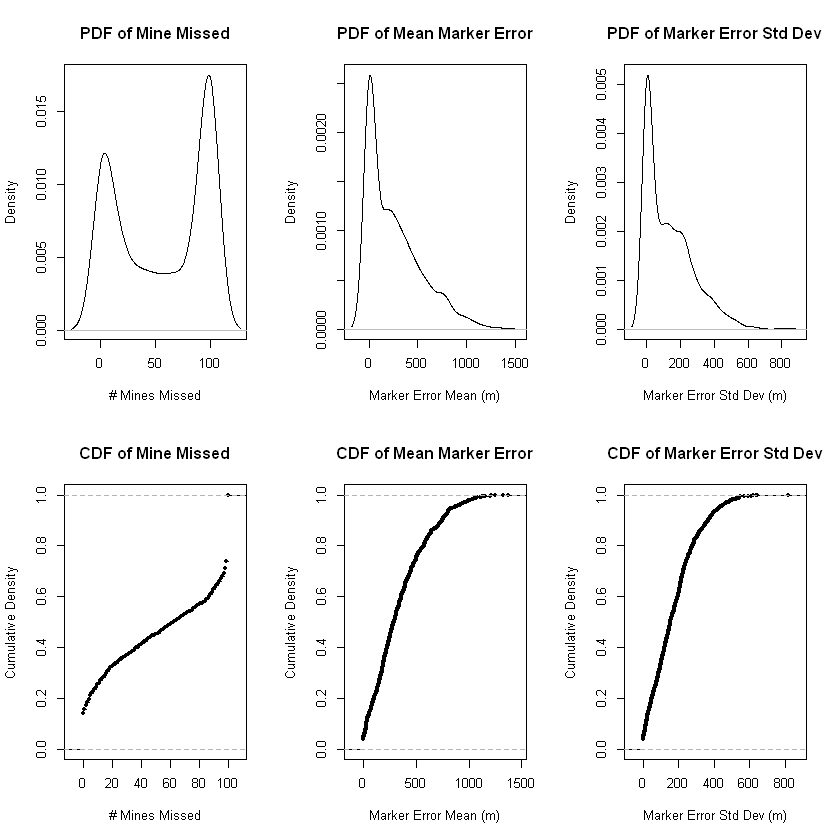

In [60]:
layout(matrix(c(1,2,3,4,5,6),2,3))
plot(density(100 - data.verify$count.mine.contacts), 
     main="PDF of Mine Missed",
     xlab='# Mines Missed',
    )
plot(data.verify.mine.ecdf, 
     main='CDF of Mine Missed',
     xlab='# Mines Missed',
     ylab='Cumulative Density'
    )
plot(density(data.verify$marker.mean), 
     main='PDF of Mean Marker Error',
     xlab='Marker Error Mean (m)'
    )
plot(data.verify.mean.ecdf, 
     main='CDF of Mean Marker Error',
     xlab='Marker Error Mean (m)',
     ylab='Cumulative Density'
    )
plot(density(data.verify$marker.std.dev), 
     main='PDF of Marker Error Std Dev',
     xlab='Marker Error Std Dev (m)'
    )
plot(data.verify.std.ecdf, 
     main='CDF of Marker Error Std Dev',
     xlab='Marker Error Std Dev (m)',
     ylab='Cumulative Density'
    )

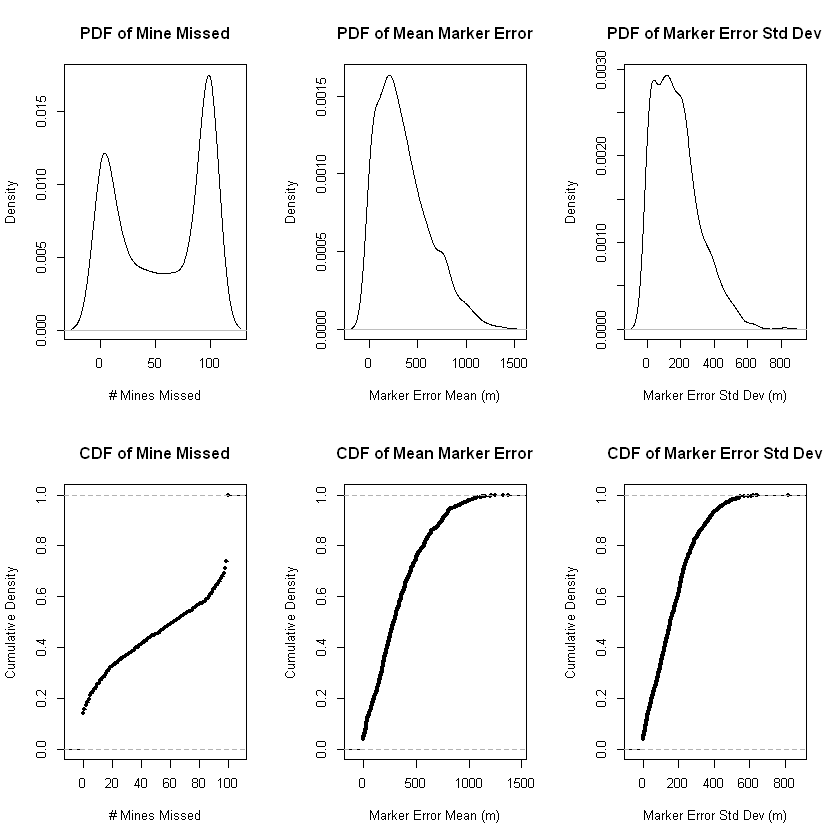

In [58]:
layout(matrix(c(1,2,3,4,5,6),2,3))
plot(density(100 - data.verify$count.mine.contacts), 
     main="PDF of Mine Missed",
     xlab='# Mines Missed',
    )
plot(data.verify.mine.ecdf, 
     main='CDF of Mine Missed',
     xlab='# Mines Missed',
     ylab='Cumulative Density'
    )
plot(density(data.verify$marker.mean[data.verify$count.mine.contacts>0]), 
     main='PDF of Mean Marker Error',
     xlab='Marker Error Mean (m)'
    )
plot(data.verify.mean.ecdf, 
     main='CDF of Mean Marker Error',
     xlab='Marker Error Mean (m)',
     ylab='Cumulative Density'
    )
plot(density(data.verify$marker.std.dev[data.verify$count.mine.contacts>0]), 
     main='PDF of Marker Error Std Dev',
     xlab='Marker Error Std Dev (m)'
    )
plot(data.verify.std.ecdf, 
     main='CDF of Marker Error Std Dev',
     xlab='Marker Error Std Dev (m)',
     ylab='Cumulative Density'
    )

In [63]:
data.verify.mean.ecdf(100)
data.verify.std.ecdf(100)

[1] 0.192429

[1] 0.3322818

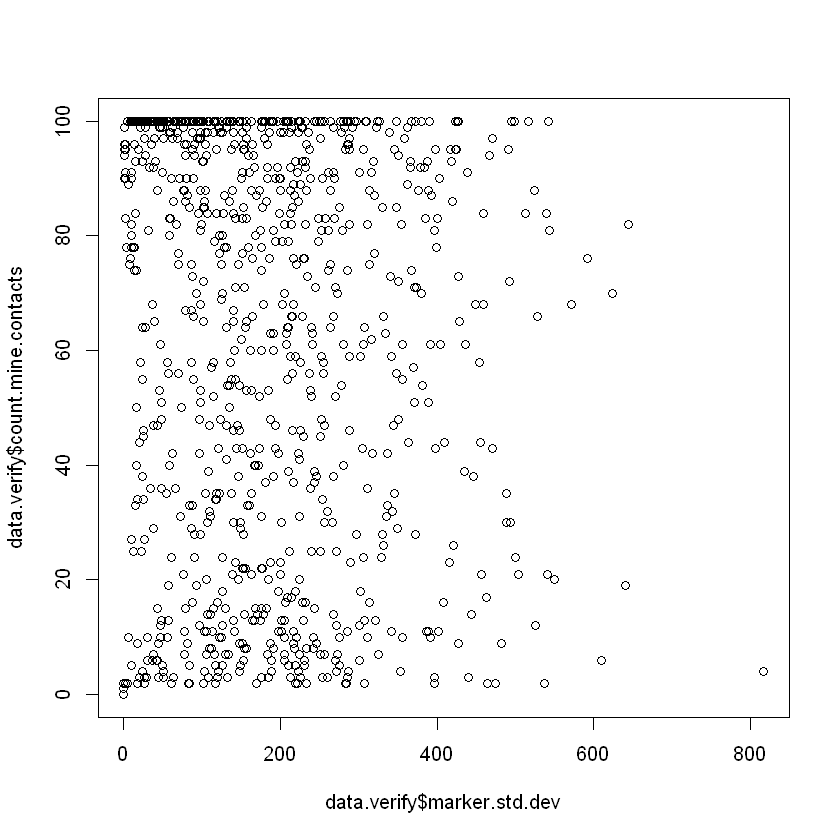

In [48]:
plot(data.verify$count.mine.contacts~data.verify$marker.std.dev)

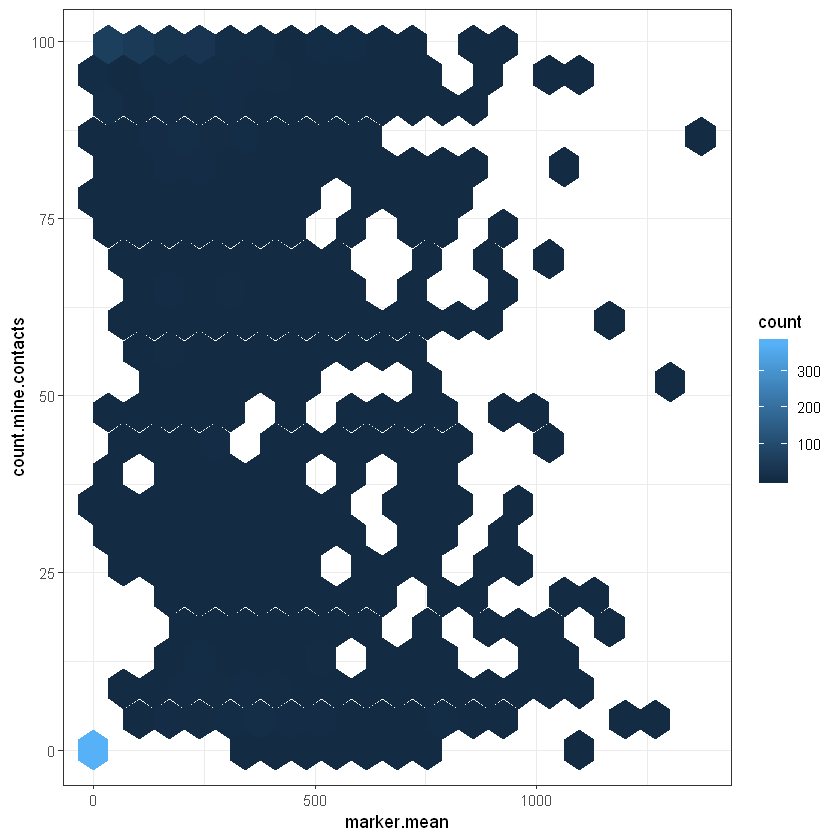

In [59]:
ggplot(data.verify, aes(x=marker.mean, y=count.mine.contacts)) + geom_hex(bins=20)+theme_bw()

In [77]:
data.verify %>% group_by(experiment.number) %>% summarize(mn <- mean(marker.mean))

experiment.number,mn <- mean(marker.mean)
0,382.657735
1,0.000000
2,2.246774
3,187.003776
4,231.849364
5,595.858799
6,539.009538
7,492.852313
8,333.369355
9,302.550066


Looking for candidate vulnerabilities to the count mine contacts MoP, we look at the correlation matrix of the data and find the signal.factor parameter has a very high correlation.

In [32]:
cor(data.verify)['count.mine.contacts',]

experiment.number                  turn.radius 
                -0.036274352                  0.047979563 
                   uuv.speed              nav.bearing.std 
                 0.007021605                 -0.148053842 
         nav.velocity.std.cm                 max.obs.dist 
                 0.000716292                  0.037195275 
               obs.influence              sonar_ping_rate 
                -0.062218352                 -0.120937299 
                  side_angle               side_low_range 
                 0.175555294                 -0.061642924 
               side_hi_range                signal.factor 
                 0.149976036                 -0.806020026 
               forward_angle            forward_low_range 
                -0.021832677                  0.037315291 
            forward_hi_range classification.threshold.std 
                 0.037015415                  0.152441341 
               X.run.number.                      X.step. 
                -0.005975337                 -0.062187076 
        number.of.collisions                max.nav.error 
                -0.033106386                 -0.123563916 
         count.mine.contacts                  marker.mean 
                 1.000000000                  0.181358643 
              marker.std.dev 
                 0.343974028

In [33]:
cor(data.verify)['marker.mean',]

experiment.number                  turn.radius 
                -0.134375629                  0.003699572 
                   uuv.speed              nav.bearing.std 
                -0.088600632                  0.453579902 
         nav.velocity.std.cm                 max.obs.dist 
                 0.040472810                  0.045851042 
               obs.influence              sonar_ping_rate 
                 0.029988755                  0.022585943 
                  side_angle               side_low_range 
                 0.005159183                 -0.012967017 
               side_hi_range                signal.factor 
                -0.150616667                 -0.335234477 
               forward_angle            forward_low_range 
                -0.033057669                 -0.027152317 
            forward_hi_range classification.threshold.std 
                -0.079716542                  0.073018858 
               X.run.number.                      X.step. 
                -0.047000601                  0.336265693 
        number.of.collisions                max.nav.error 
                -0.047865412                  0.471304256 
         count.mine.contacts                  marker.mean 
                 0.181358643                  1.000000000 
              marker.std.dev 
                 0.814736264

We test the fit of a simple regression model considering only the signal factor.  This fits surprisingly well considering the number of parameters in the model, with an adjusted R-squared of 0.65.  However, there are still factors beyond the signal factor influencing the mine count.


Call:
lm(formula = 100 - count.mine.contacts ~ signal.factor, data = data.verify)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.557 -12.463   0.788  14.455  83.816 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.11667    1.34446  -0.831    0.406    
signal.factor  1.26200    0.02582  48.872   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24.29 on 1288 degrees of freedom
Multiple R-squared:  0.6497,	Adjusted R-squared:  0.6494 
F-statistic:  2389 on 1 and 1288 DF,  p-value: < 2.2e-16


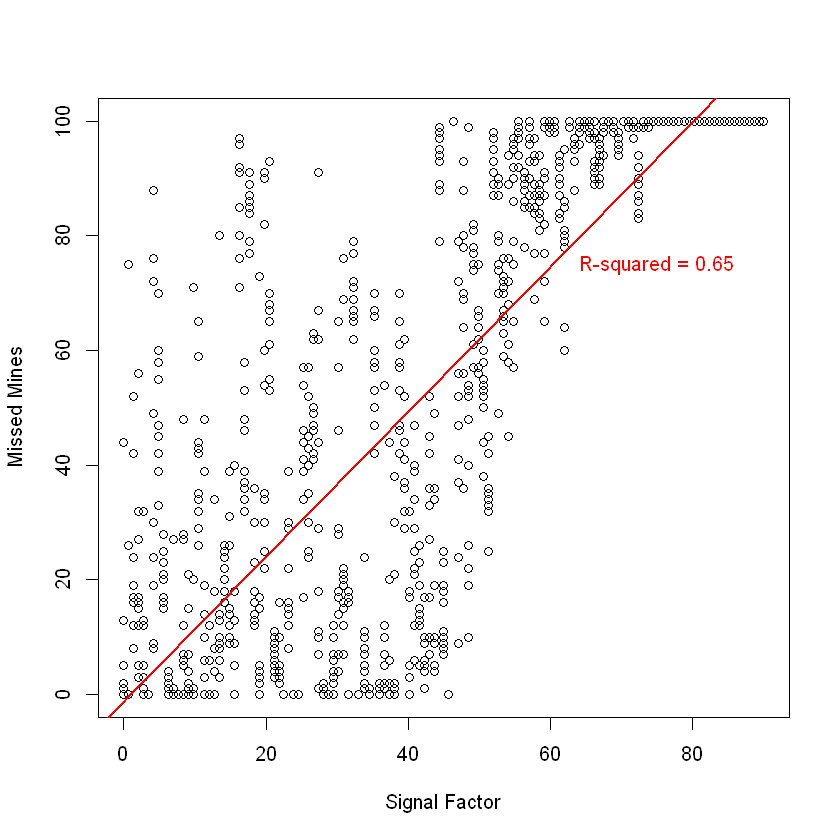

In [34]:
mine.model <- lm(100-count.mine.contacts~signal.factor, data=data.verify)
plot(100-data.verify$count.mine.contacts~data.verify$signal.factor, xlab='Signal Factor', ylab='Missed Mines')
text(75,75,'R-squared = 0.65', col='red')
abline(mine.model, col='red', lwd=2)
summary(mine.model)

Notice that the data variability increases as the signal factor decreases, suggesting that the parameter dominates when it is high, but becomes less of a factor at lower values.  Since the side sonar is responible for mine detections, we look at interactions of the parameters associated with the sensor.

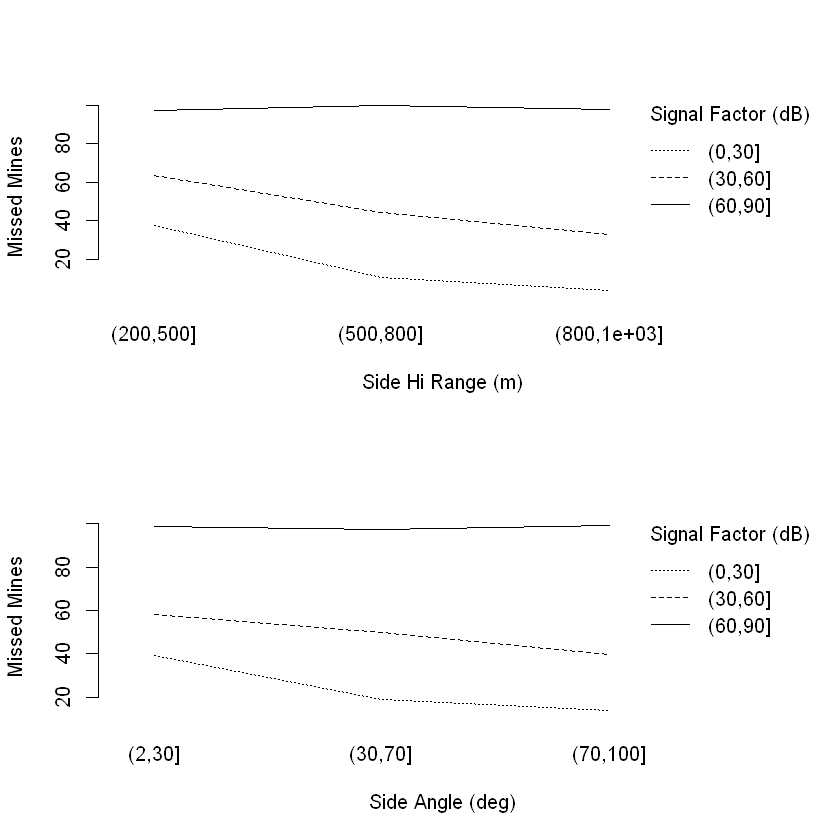

In [35]:
layout(matrix(c(1,2),2,1))
par(xpd=NA)
interaction.plot(cut(data.verify$side_hi_range, breaks=c(200,500,800,1000)), cut(data.verify$signal.factor, breaks=c(0,30,60,90)), 100 - data.verify$count.mine.contacts, trace.label='Signal Factor (dB)', xlab='Side Hi Range (m)', ylab='Missed Mines', fixed=TRUE, bty='n')
par(xpd=NA)
interaction.plot(cut(data.verify$side_angle, breaks=c(2,30,70,100)), cut(data.verify$signal.factor, breaks=c(0,30,60,90)), 100 - data.verify$count.mine.contacts, trace.label='Signal Factor (dB)', xlab='Side Angle (deg)', ylab='Missed Mines', fixed=TRUE, bty='n')
#par(xpd=NA)
#interaction.plot(cut(data.verify$side_hi_range, breaks=c(200,500,800,1000)), cut(data.verify$side_angle, breaks=c(2,30,70,100)), 100 - data.verify$count.mine.contacts, trace.label='Side Angle (deg)', xlab='Side Hi Range (m)', ylab='Missed Mines')


The other strong correlation was between the navigation bearing error and the mine marker accuracy.  The simple linear model shows that the bearing error is a contributor to the marker accuracy, but plotting the fit line on the data suggests a nonlinear relationship exists.


Call:
lm(formula = marker.mean ~ nav.bearing.std, data = data.verify)

Residuals:
    Min      1Q  Median      3Q     Max 
-464.94 -170.78  -22.13  139.19 1001.96 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        40.46      13.65   2.964  0.00309 ** 
nav.bearing.std   215.47      11.80  18.265  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 246.5 on 1288 degrees of freedom
Multiple R-squared:  0.2057,	Adjusted R-squared:  0.2051 
F-statistic: 333.6 on 1 and 1288 DF,  p-value: < 2.2e-16


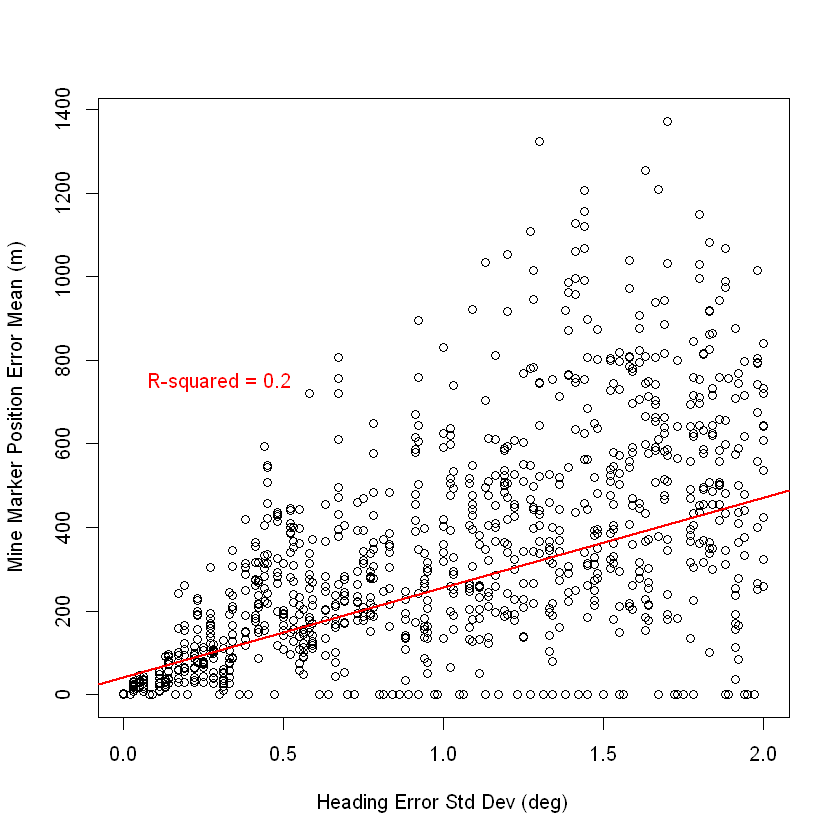

In [43]:
mean.model <- lm(marker.mean~nav.bearing.std, data=data.verify)
summary(mean.model)
plot(marker.mean~nav.bearing.std, data=data.verify, xlab='Heading Error Std Dev (deg)', ylab='Mine Marker Position Error Mean (m)')
text(.3,750,'R-squared = 0.2', col='red')
abline(mean.model, col='red', lwd=2)


Similarly, the bearing error contributes to the 


Call:
lm(formula = max.nav.error ~ nav.bearing.std, data = data.verify)

Residuals:
     Min       1Q   Median       3Q      Max 
-1673.85  -294.40   -44.43   313.91  1651.96 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       277.69      28.34   9.797   <2e-16 ***
nav.bearing.std   894.97      24.49  36.539   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 511.8 on 1288 degrees of freedom
Multiple R-squared:  0.509,	Adjusted R-squared:  0.5086 
F-statistic:  1335 on 1 and 1288 DF,  p-value: < 2.2e-16


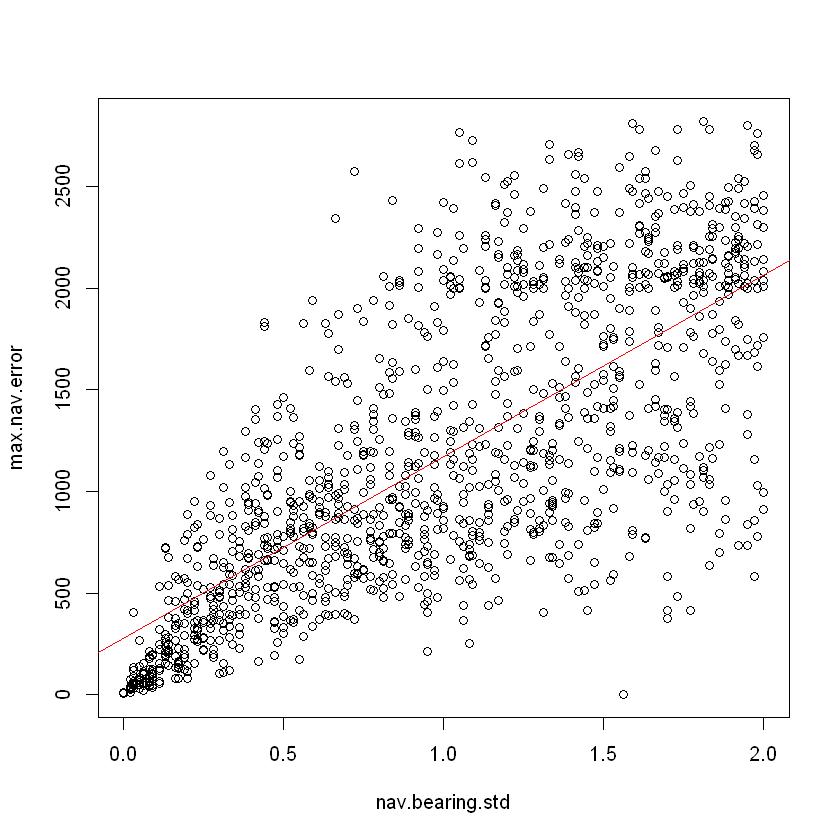

In [37]:
nav.model <- lm(max.nav.error~nav.bearing.std, data=data.verify)
summary(nav.model)
plot(max.nav.error~nav.bearing.std, data=data.verify)
abline(nav.model, col='red')